In [13]:
from sklearn import datasets, model_selection, svm, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.externals import joblib
import numpy as np
import pandas as pd
import threading
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp
from sklearn.preprocessing import StandardScaler

In [14]:
###Poista hävityt
###Poista pelien määrä
###Poista lineaarisen yhteyden sisältävät muuttujat

##Prepare data##

filename=r'NbaStats.csv'
data_train=pd.read_csv(filename,index_col=None,na_values='?',sep = ';')
data_train=data_train.drop(['Losses'], axis=1)
data_train=data_train.dropna()
#data_train['Game Played'].replace(to_replace=['M'], value=0,inplace=True)
#data_train['Sukupuoli'].replace(to_replace=['N'], value=1,inplace=True)

#print(data_train.head(10))
#df.head()

print("\nDESCRIBE DATA:\n",data_train.describe())
data_train.describe().to_excel(r'original_Describe.xlsx')


DESCRIBE DATA:
        Game Played       Wins     WIN %  Minutes Played      Points  \
count         30.0  30.000000  30.00000       30.000000   30.000000   
mean          82.0  41.000000   0.50000       48.283333  106.336667   
std            0.0  12.222083   0.14908        0.164177    3.800860   
min           82.0  21.000000   0.25600       48.100000   98.800000   
25%           82.0  28.250000   0.34425       48.125000  103.500000   
50%           82.0  44.000000   0.53700       48.250000  106.050000   
75%           82.0  48.000000   0.58500       48.400000  109.375000   
max           82.0  65.000000   0.79300       48.700000  113.500000   

       Field Goals Made  Field Goals Attempted  Field Goal %  \
count         30.000000              30.000000     30.000000   
mean          39.606667              86.063333     46.026667   
std            1.393317               1.552192      1.504461   
min           36.700000              82.800000     43.500000   
25%           38.700000

C:\Users\Acer\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Acer\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


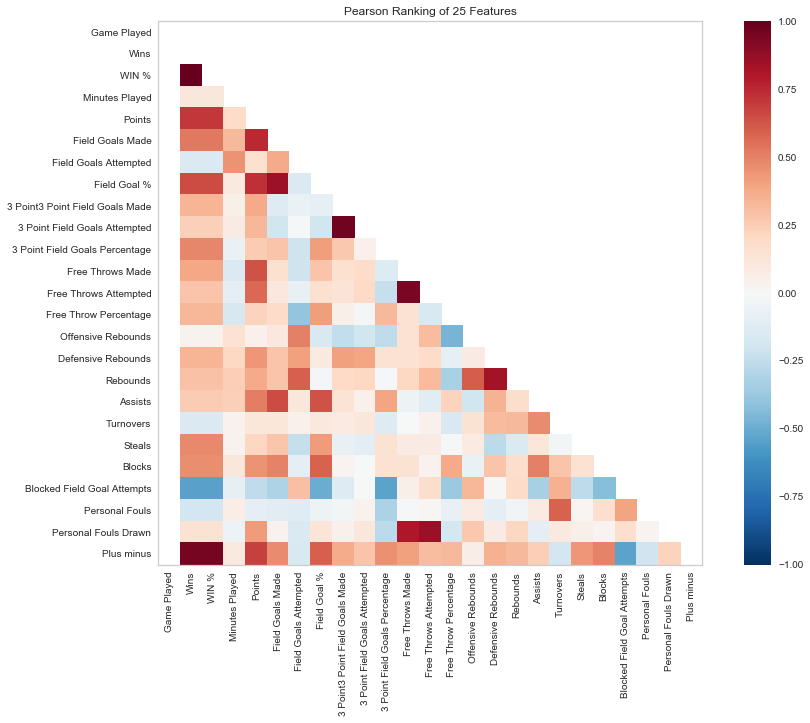

In [15]:
from yellowbrick.features import Rank2D


visualizer = Rank2D(algorithm="pearson",size=(1080, 720))
visualizer.fit_transform(data_train)# or df_scaled
visualizer.show()

#Win% & Wins


In [16]:
data_train=data_train.drop(['WIN %'], axis=1)
data_train=data_train.drop(['Game Played'], axis=1)
data_train=data_train.drop(['3 Point Field Goals Attempted'], axis=1)
data_train=data_train.drop(['Free Throws Attempted'], axis=1)
data_train=data_train.drop(['Plus minus'], axis=1)
data_train=data_train.drop(['Field Goal %'], axis=1)
data_train=data_train.drop(['Personal Fouls Drawn'], axis=1)
data_train=data_train.drop(['Defensive Rebounds'], axis=1)

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [24]:
colnames = data_train.columns.get_values()
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data_train))
print(df_scaled)
df_scaled.drop[:0] 
print(df_scaled)

          0         1         2         3         4         5         6   \
0   1.997228 -0.516260  1.622524 -0.661849 -1.220975  3.252681  0.024038   
1   1.497921  0.722764  1.435207  1.236101  0.875870  0.887504 -0.336538   
2   1.414703 -1.135772  1.916880  2.331073 -0.631238  0.549622  2.638219   
3   1.165050  0.103252 -0.625283 -0.953842 -0.631238  0.684775  1.376201   
4   0.915396 -0.516260  0.926774  0.871111  0.351658  0.346893  0.655048   
5   0.748960 -1.135772  1.221130  0.579118 -0.827817  1.022657  0.925480   
6   0.665743 -0.516260 -0.197129 -0.223861  0.613764 -0.126143  0.384615   
7   0.582525 -0.516260 -0.197129  0.871111  0.220606 -1.004637  0.655048   
8   0.582525  2.581301  1.435207  2.258075  1.465607 -0.193719  0.024038   
9   0.582525  0.722764  0.418342  0.214128  1.334554  0.144163 -0.697115   
10  0.582525 -0.516260 -0.598523 -0.953842 -2.072818  0.211740  0.384615   
11  0.499307  0.103252  0.846496  1.017107  0.024026 -1.680402 -0.426682   
12  0.499307

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


TypeError: 'method' object is not subscriptable

In [8]:

'''data_train.plot(x='3 Point3 Point Field Goals Made', y='3 Point Field Goals Attempted', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()'''


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


NameError: name 'y_all' is not defined

In [17]:
from sklearn.linear_model import LinearRegression
X_all =data_train.drop['Wins']#data_train
#print(X_all)
y_all = data_train['Wins']
#print(y_all.head())

test_size=2
train_size=28

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_all, y_all, test_size=test_size, train_size=train_size)


    
from sklearn.neighbors import KNeighborsClassifier as KNN
    
k_range=range(2,10)
scores={}
scores_list=[]
error=[]

###Classifier###
for k in k_range:    
    clf = LinearRegression()  

    ###Train###
    clf.fit(X_train, y_train)

    ###Predict###
    pre = clf.predict(X_test)

    ###Accuracy of Classifier###
    accuracy_score = metrics.accuracy_score(y_test, pre)
    print(k," ",accuracy_score)

    #Matrix of results
    result_matrix = metrics.confusion_matrix(pre,y_test)
   # print(k,"\n",result_matrix)
    
    scores[k] = metrics.accuracy_score(y_test,pre)

    scores_list.append(accuracy_score)
    
    #Error values
    error.append(np.mean(pre != y_test))
    


TypeError: 'method' object is not subscriptable